In [25]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [26]:
import praw

reddit = praw.Reddit(client_id='<UPfRPV-K_Bw2z0WZiWJcSA>',
                     client_secret='<7QjD6RbJUqS27JJuoPUgsWKULvweFw>',
                     user_agent='<Present_Project3381>')

In [32]:
reddit = praw.Reddit(
    client_id="UPfRPV-K_Bw2z0WZiWJcSA",
    client_secret="7QjD6RbJUqS27JJuoPUgsWKULvweFw",
    user_agent="Present_Project3381",
    username="Dasha",
)

In [33]:
print(reddit.user.me())

None


/var/folders/nj/5r0yzm1x5d1328hnjtkgdns00000gn/T/ipykernel_21025/2572331335.py:1: DeprecationWarning: The `None` return value is deprecated, and will raise a `ReadOnlyException` beginning with PRAW 8. See documentation for forward compatibility options.
  print(reddit.user.me())


In [34]:
headlines = set()

In [42]:
for submission in reddit.subreddit('NFT').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

1883


In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.4404,
  'headline': 'Former defense secretary Mark Esper: President Trump suggested shooting protesters, '
              'missile strikes in Mexico',
  'neg': 0.26,
  'neu': 0.651,
  'pos': 0.089},
 {'compound': 0.0,
  'headline': 'The first NFT collection with a humanitarian focus and a real participatory DAO !',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Shakespeare sculptures NFT is the power of art.',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [44]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.26,0.651,0.089,-0.4404,Former defense secretary Mark Esper: President...
1,0.00,1.000,0.000,0.0000,The first NFT collection with a humanitarian f...
2,0.00,1.000,0.000,0.0000,Shakespeare sculptures NFT is the power of art.
3,0.00,0.714,0.286,0.2500,Only chance to get a Founder ZE-RO
4,0.00,0.856,0.144,0.4019,Are There Any NFT ARTISTS Who Are Interested I...


In [45]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.26,0.651,0.089,-0.4404,Former defense secretary Mark Esper: President...,-1
1,0.00,1.000,0.000,0.0000,The first NFT collection with a humanitarian f...,0
2,0.00,1.000,0.000,0.0000,Shakespeare sculptures NFT is the power of art.,0
3,0.00,0.714,0.286,0.2500,Only chance to get a Founder ZE-RO,1
4,0.00,0.856,0.144,0.4019,Are There Any NFT ARTISTS Who Are Interested I...,1


In [47]:
df2 = df[['headline', 'label']]
df2.to_csv('NFT_reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

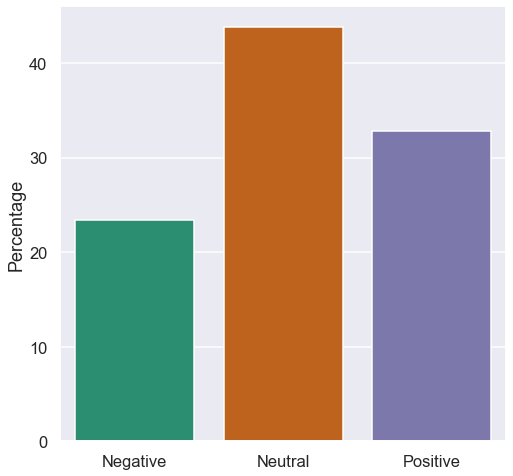

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()